<a href="https://colab.research.google.com/github/dmadq35/computer-vision/blob/main/Lab2(yellow_and_conturs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ligux.jpg to ligux (16).jpg


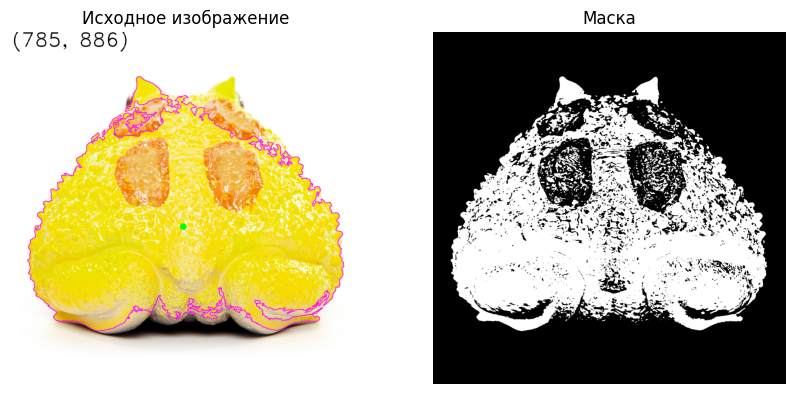

In [20]:
# Импорт необходимых библиотек
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Загрузка изображения
uploaded = files.upload()
image_path = next(iter(uploaded))

# Считываем кадр
frame = cv2.imread(image_path)

# Преобразуем в HSV
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Задаем пороги
low_yellow = np.array([20, 110, 110])
high_yellow = np.array([40, 255, 255])

# Создаем маску
mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)

# Находим контуры
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Ищем самый большой контур
max_area = 0
largest_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour

# Находим центр самого большого контура
if largest_contour is not None:
    # Рисуем самый большой контур
    cv2.drawContours(frame, [largest_contour], -1, (255, 0, 255), 2)

    # Вычисляем моменты
    M = cv2.moments(largest_contour)
    if M["m00"] != 0:  # Проверяем, что масса не равна нулю
        cX = int(M["m10"] / M["m00"])  # Координата X центра
        cY = int(M["m01"] / M["m00"])  # Координата Y центра

        # Рисуем центр (большая точка) на изображении
        cv2.circle(frame, (cX, cY), 15, (0, 255, 0), -1)  # Большой зелёный круг

        # Выводим координаты на изображении (в левом верхнем углу)
        text = f"({cX}, {cY})"
        cv2.putText(frame, text, (10, 70),
                    cv2.FONT_HERSHEY_DUPLEX, 3, (0, 0, 0), 2)
    else:
        print("Центр не найден: нулевая масса момента.")
else:
    print("Нет подходящих контуров.")

# Выводим кадр с контуром и центром
plt.figure(figsize=(10, 5))  # Размер в дюймах

plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Маска')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.show()



